## 02 - Sistemas de Juego
Challenge Data Analyst - NeuralWorks  
Postulante: Ignacio Tapia  
Diciembre 2022

In [1]:
import os
#os.chdir('../')

import sqlite3
import pandas as pd
from utils import database as db

# 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_match = db.read_from_sqlite(sql_file='queries/select/matches.sql', path_db='data/database.sqlite')

In [3]:
df_match['home_player_X1'] = 5.0
df_match['home_player_Y1'] = 1.0
df_match['away_player_X1'] = 5.0
df_match['away_player_Y1'] = 1.0

In [4]:
def get_playing_system(y_pos):
    
    #Contar jugadores por línea
    line_count = y_pos.value_counts().sort_index(ascending=True)
    
    #Generar lista con sistema de juego
    ply_sys_list = [str(x) for x in line_count]
    
    if sum(line_count) == 11 and ply_sys_list[0] == '1':
        ply_sys_string = '-'.join(ply_sys_list)
        return ply_sys_string
    else:
        return None

In [5]:
df_match['home_playing_sys'] = df_match.iloc[:,33:44].apply(get_playing_system, axis=1)
df_match['away_playing_sys'] = df_match.iloc[:,44:55].apply(get_playing_system, axis=1)

In [31]:
ply_sys_frequency = df_match['away_playing_sys'].value_counts(1)
print(f'La BBDD contiene {ply_sys_frequency.shape[0]} sistemas de juego')

La BBDD contiene 25 sistemas de juego


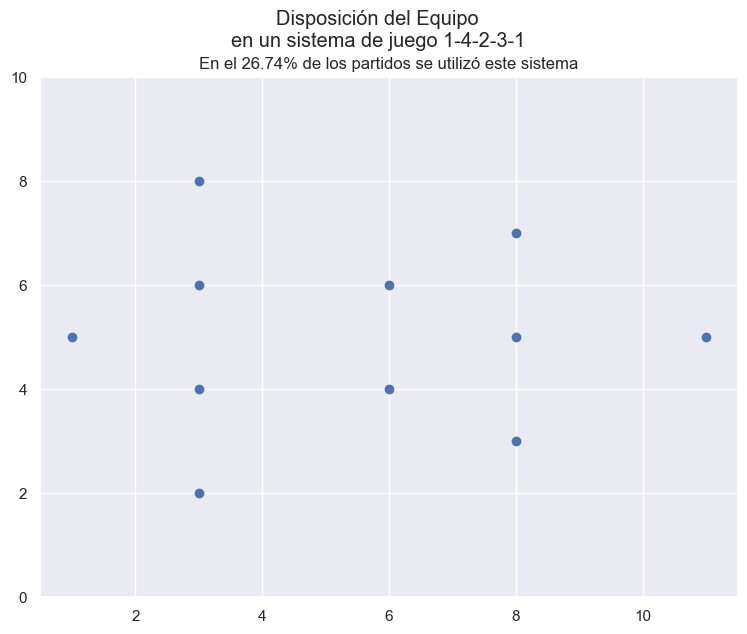

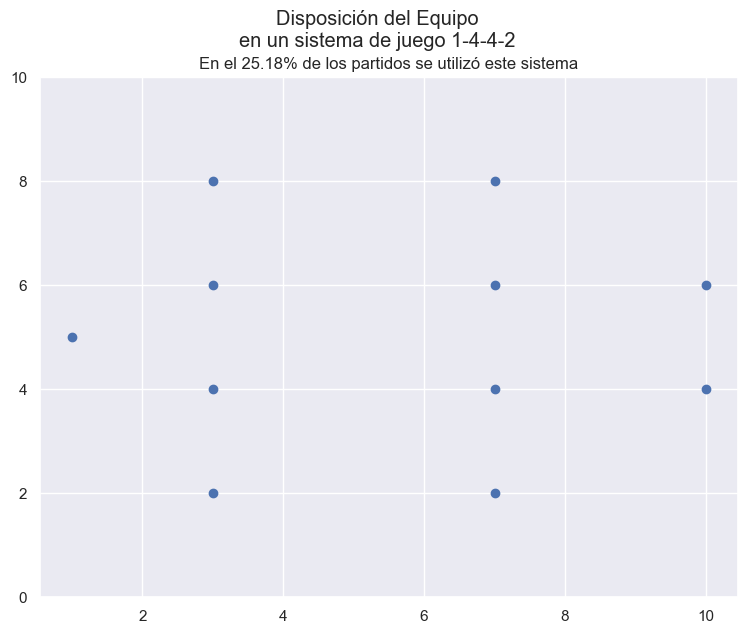

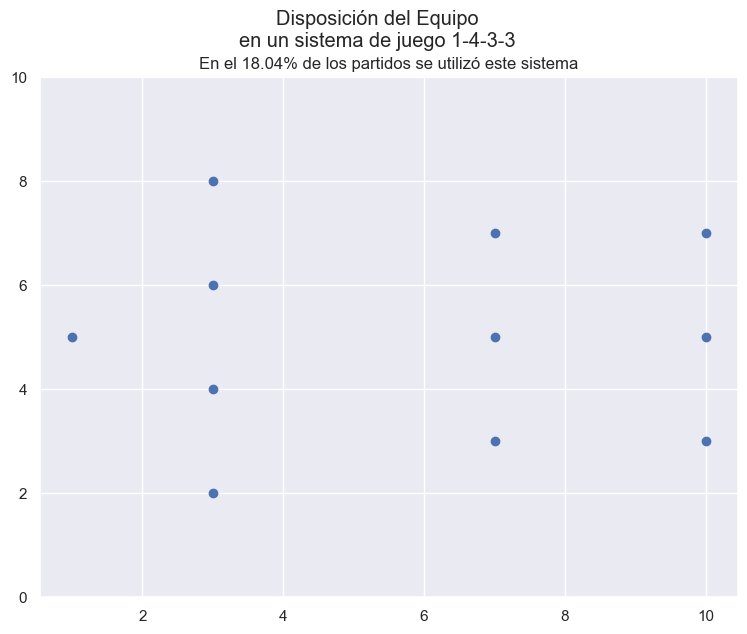

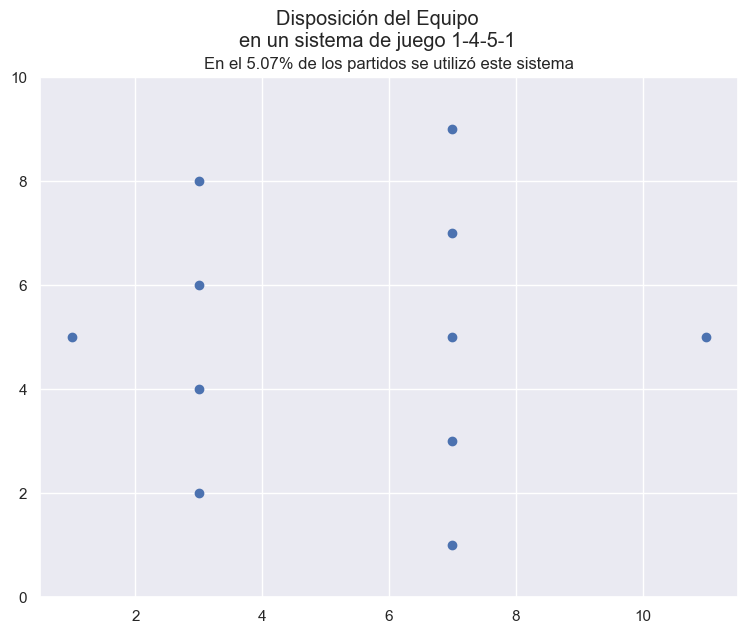

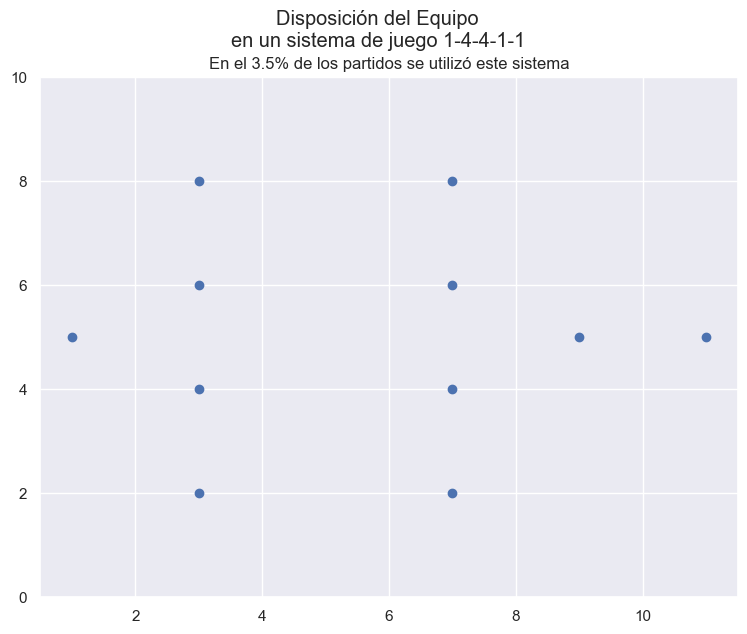

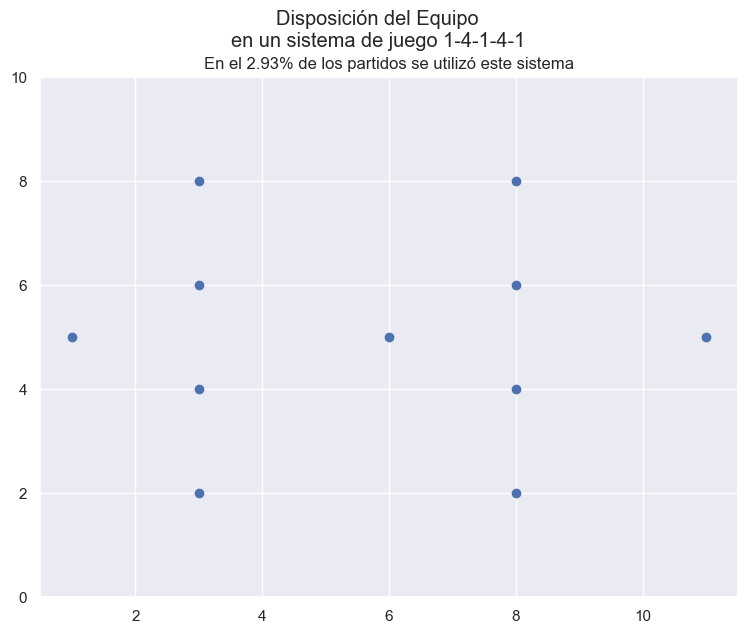

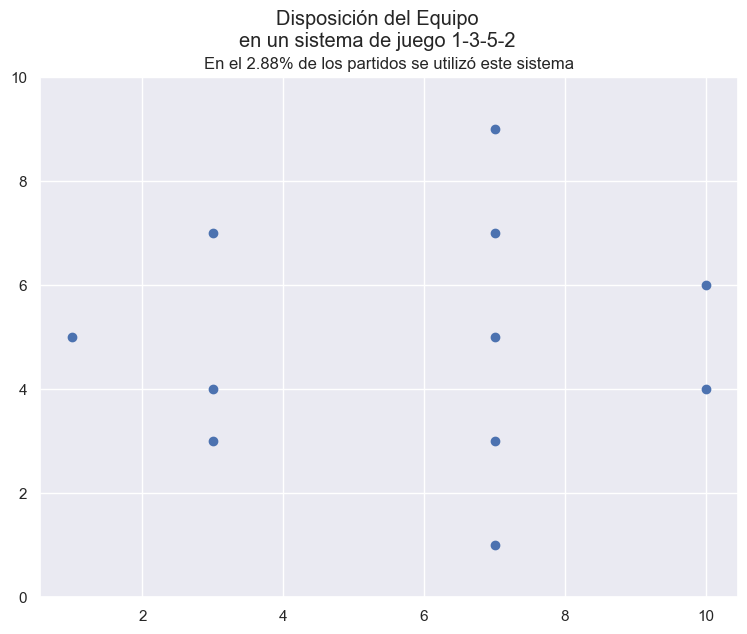

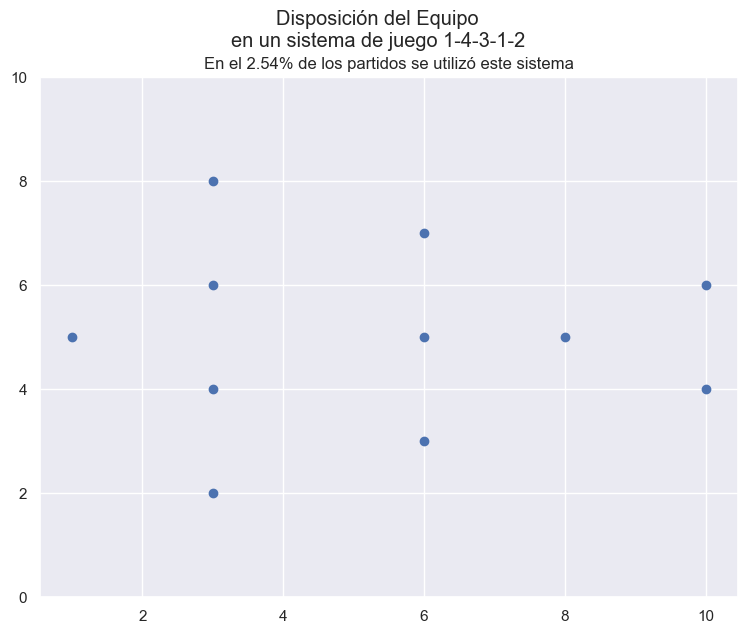

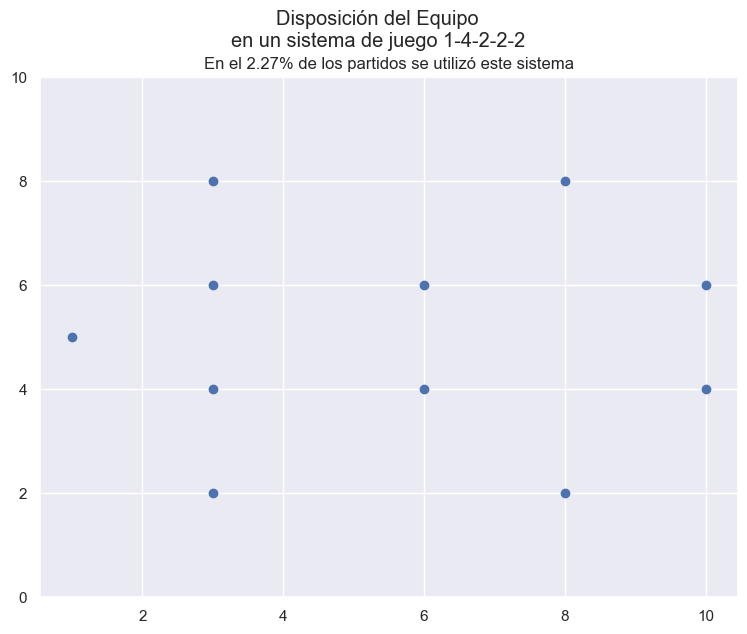

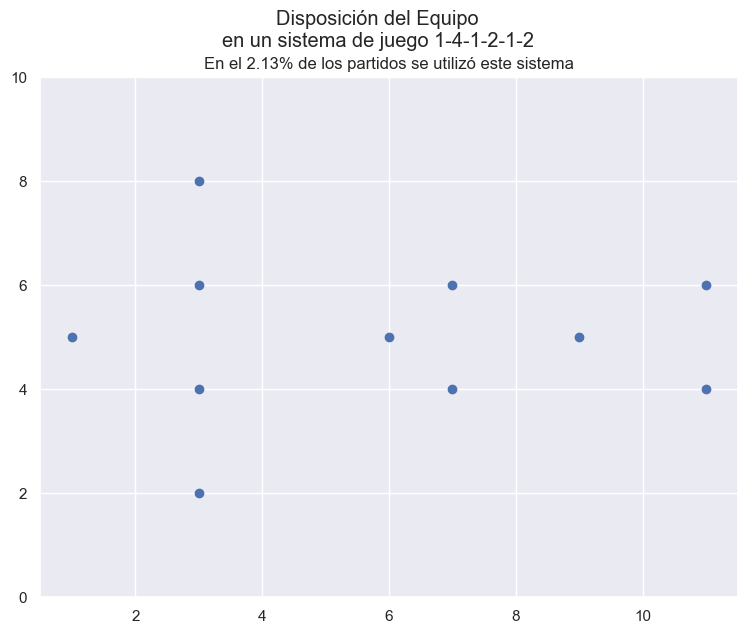

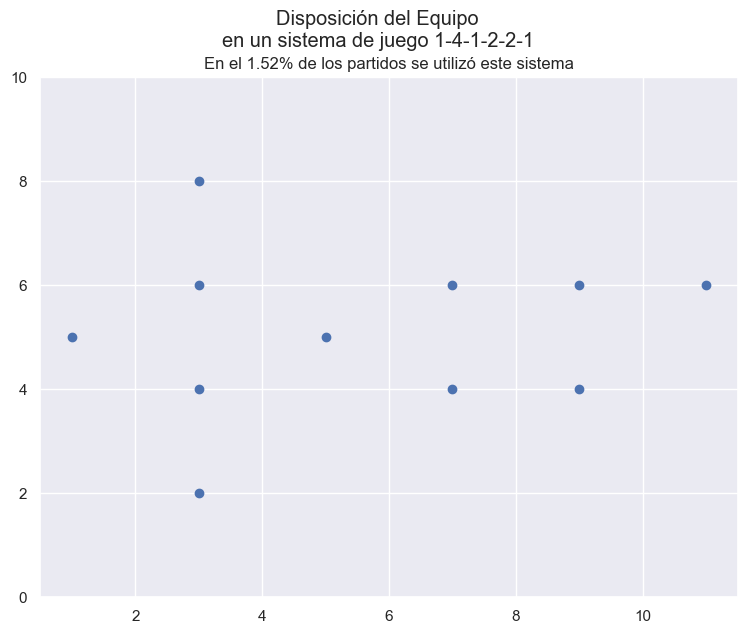

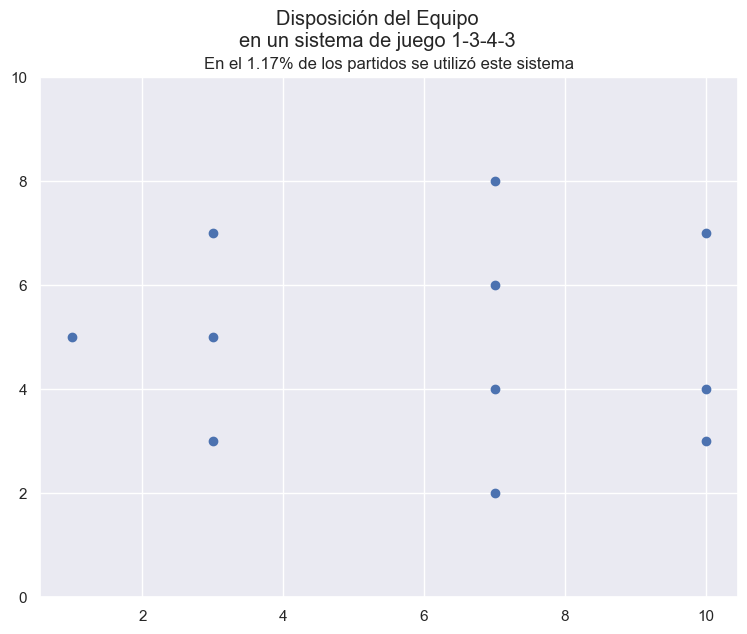

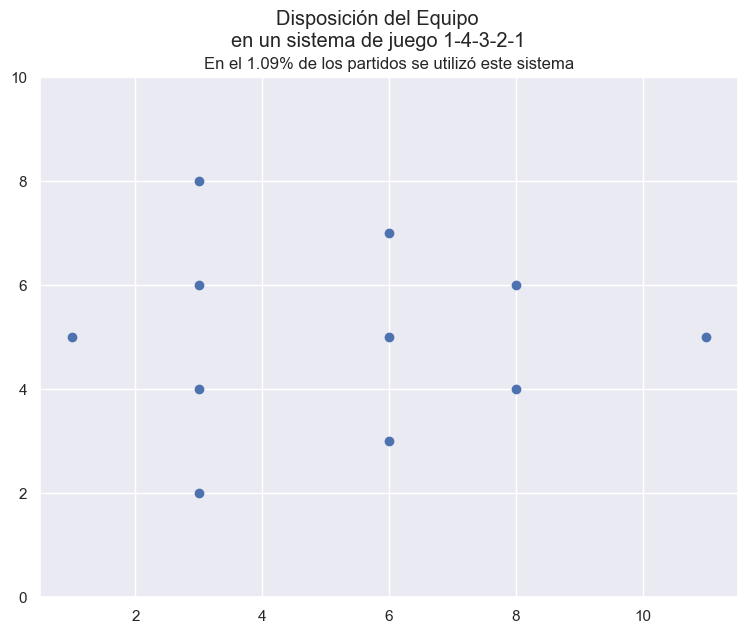

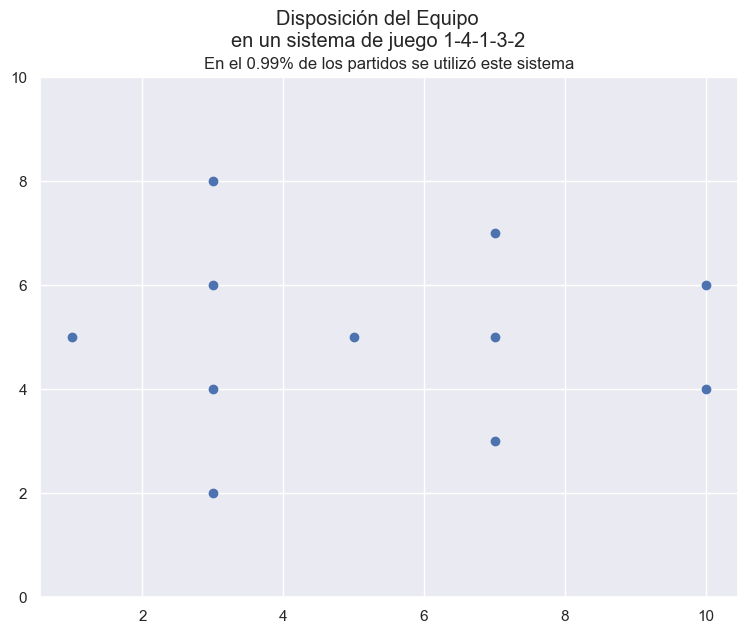

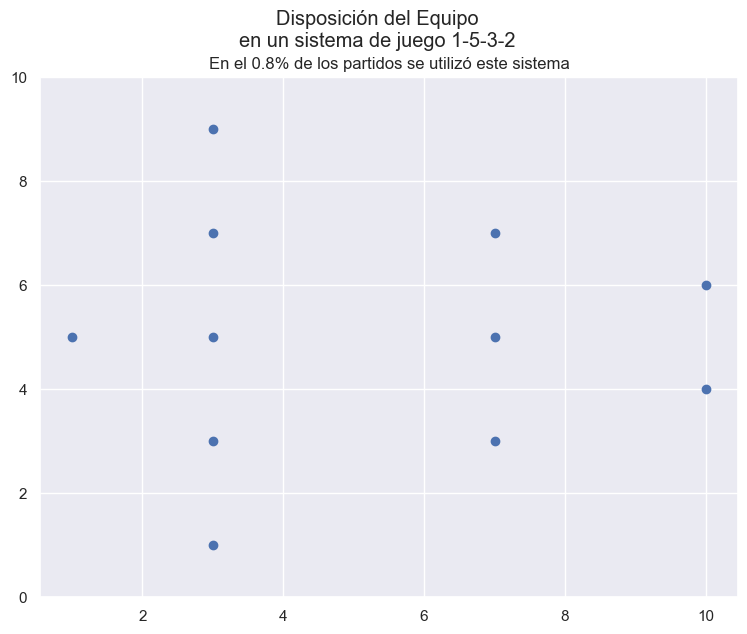

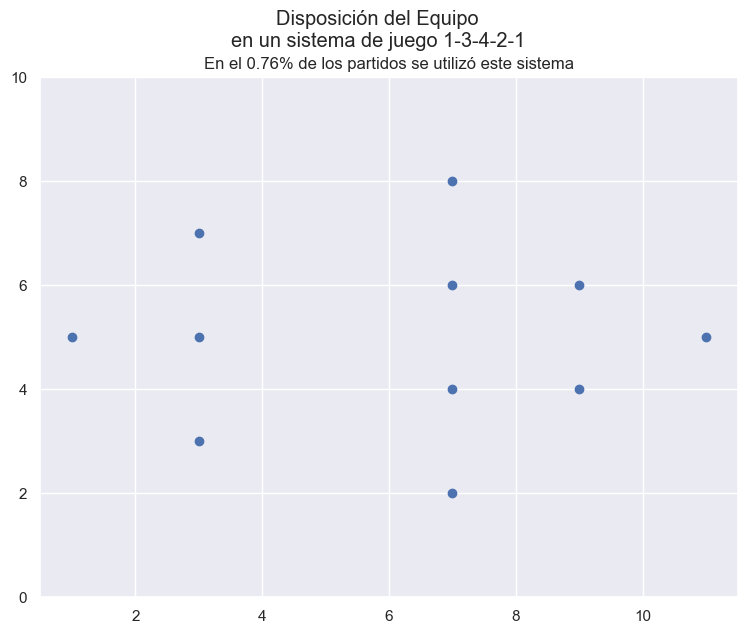

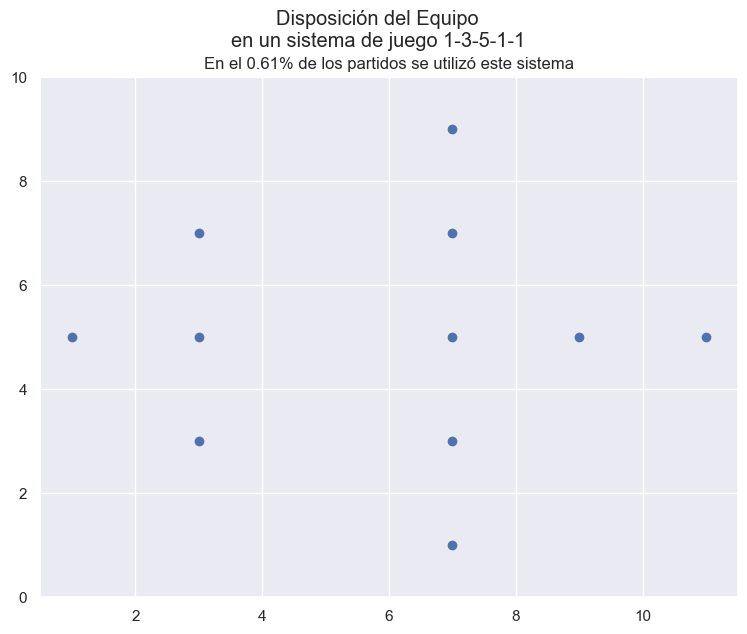

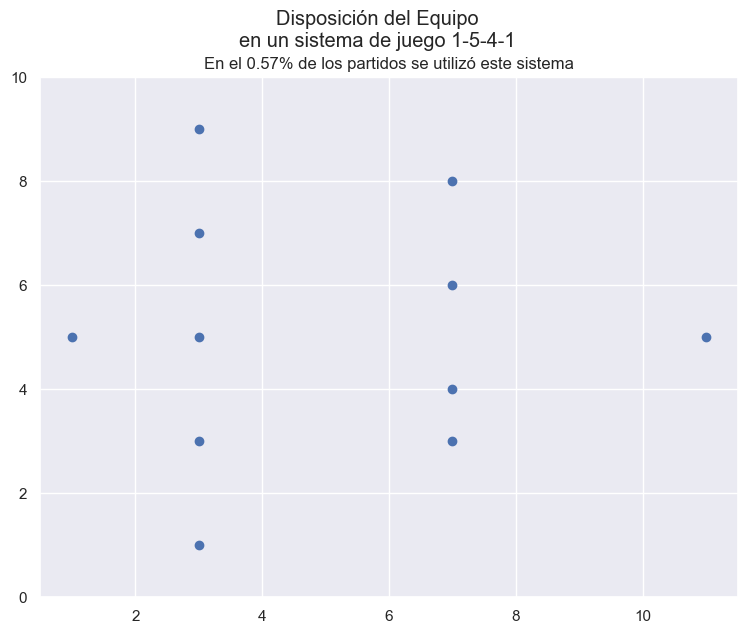

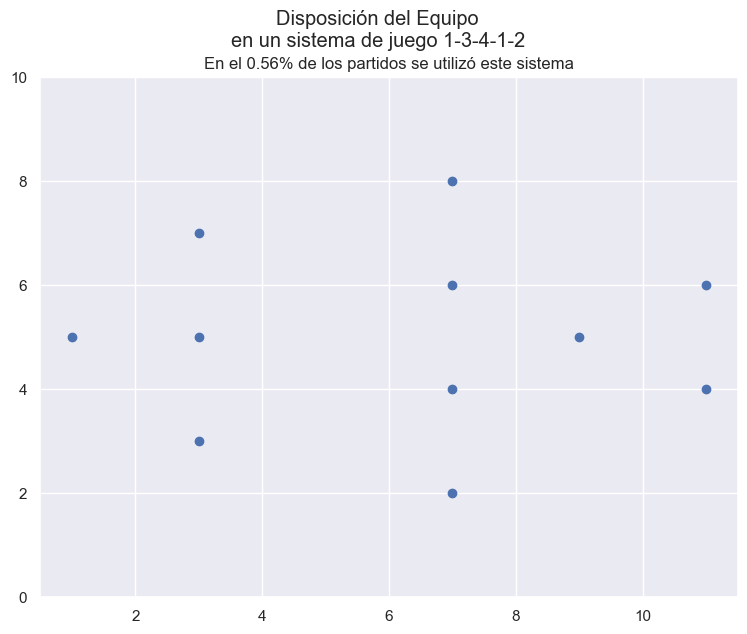

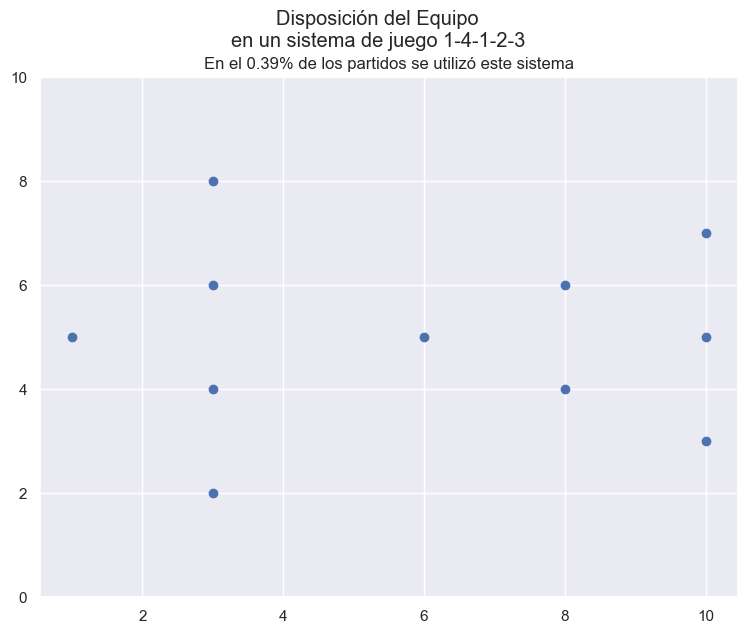

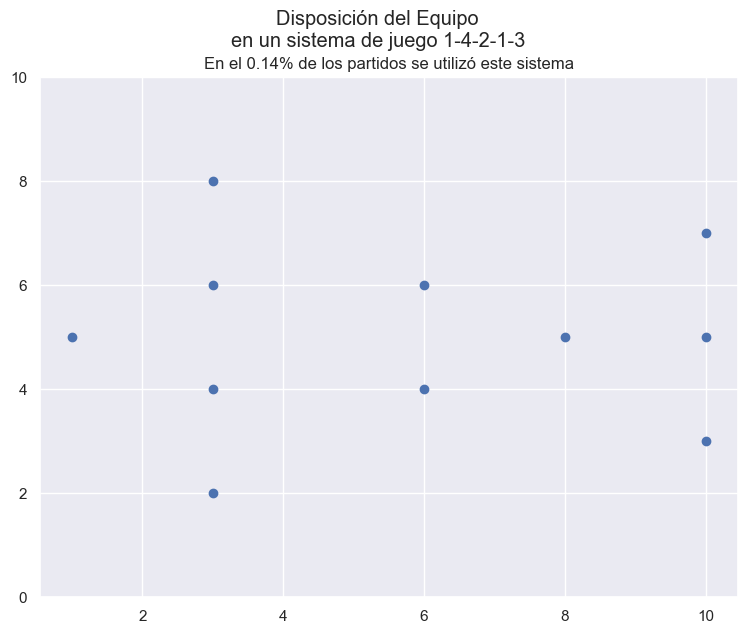

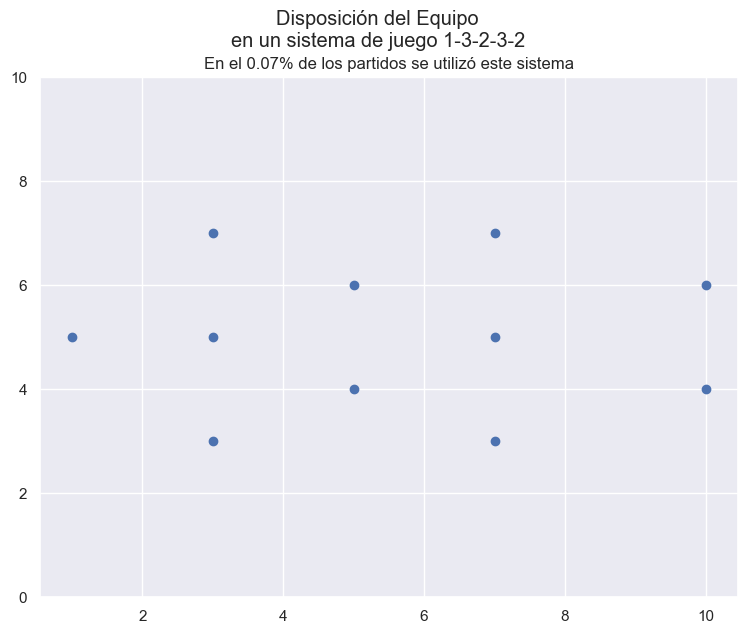

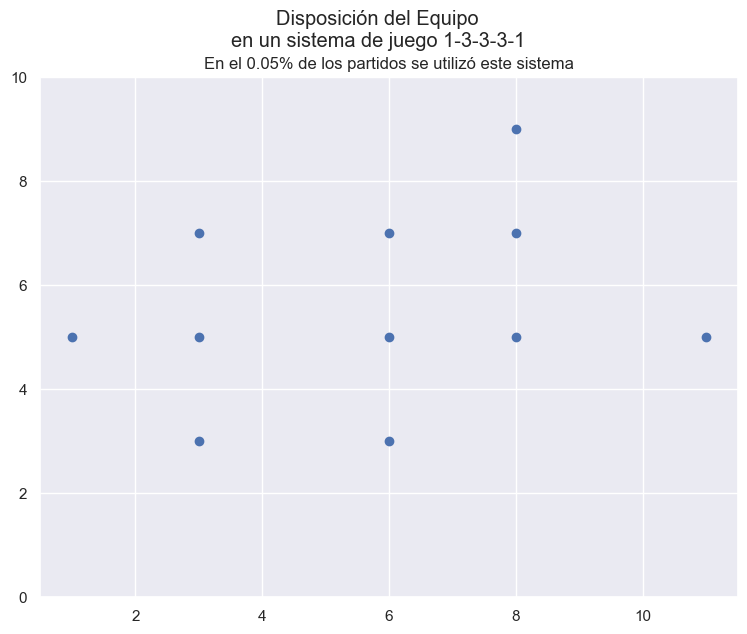

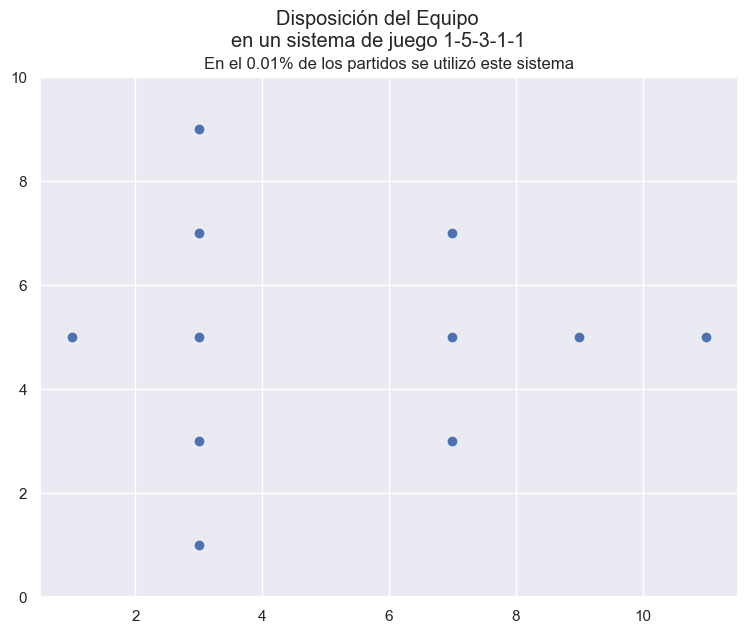

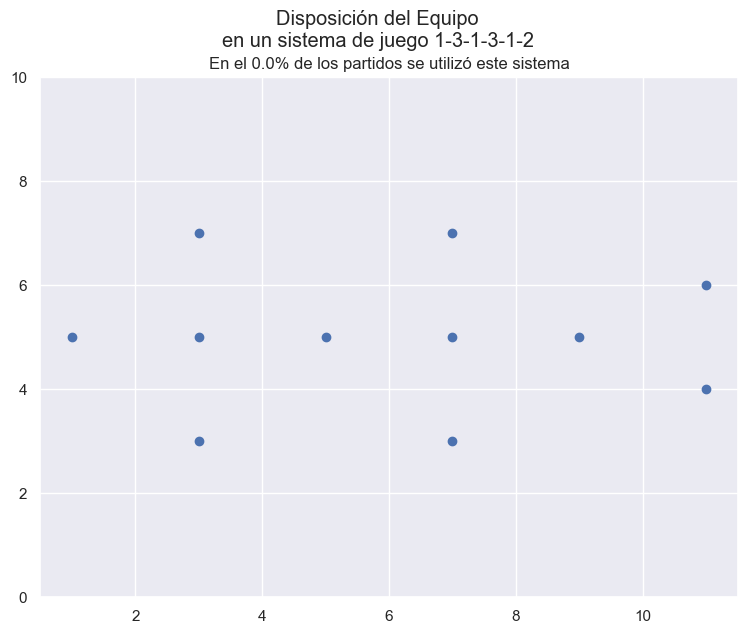

In [32]:
for ply_sys in ply_sys_frequency.index:
        
    ply_sys_index = df_match[df_match['away_playing_sys'] == ply_sys].index[0]
    
    pos_x = df_match.iloc[ply_sys_index,22:33]
    pos_y = df_match.iloc[ply_sys_index,44:55]
    
    plt.figure(figsize=(9,6.75))
    plt.scatter(pos_y, pos_x)
    plt.suptitle(f'Disposición del Equipo\nen un sistema de juego {ply_sys}', y=0.98)
    plt.title(f'En el {round(ply_sys_frequency[ply_sys] * 100,2)}% de los partidos se utilizó este sistema')
    plt.ylim((0,10))
    plt.show()
    
    counter_plot += 1